# Routed Sequencing

This model introduces routing in the sequencing model. The addition of routing allows the system to choose between two different actions: whether to go through the sequence, or be driven by the visual input as explained in the book. For instance, if the visual input has its value set to 0.8*START+D, the model will begin cycling through at D->E, etc. Thus in this model, the input doesn't prevent the activation of the second rule in the sequence. 

In [1]:
#Setup the environment
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
from nengo import spa      #import spa related packages

## Create the Model
The parameters used in the model are as described in the book, with 16 dimensions for all semantic pointers.

In Nengo 1.4, a buffer element for representing the `vision` was created by using Buffer() as described in the book. However, in Nengo 2.0, you will have to use State() with feedback parameter set to 0 (which is the default value in nengo).

In [10]:
#Number of dimensions for the Semantic Pointers
dimensions = 16

#Make a model object with the SPA network
model = spa.SPA(label='Routed_Sequence', seed=20)

with model:
    #Specify the modules to be used
    model.state = spa.State(dimensions=dimensions, feedback=1, feedback_synapse=0.01)
    model.vision = spa.State(dimensions=dimensions) 
    
    #Specify the action mapping
    actions = spa.Actions(
        'dot(vision, START) --> state = vision',
        'dot(state, A) --> state = B',
        'dot(state, B) --> state = C',
        'dot(state, C) --> state = D',
        'dot(state, D) --> state = E',
        'dot(state, E) --> state = A'
    )
    
    #Creating the BG and Thalamus components that confirm to the specified rules
    model.BG = spa.BasalGanglia(actions=actions)
    model.thal = spa.Thalamus(model.BG)
    
    #Function that provides the model with an initial input semantic pointer.
    def start(t):
        if t < 0.4:
            return '0.8*START+D'
        else:
            return '0'

    #Input
    model.input = spa.Input(vision=start)

## Run the Model

In [ ]:
#Import the nengo_gui visualizer
from nengo_gui.ipython import IPythonViz
IPythonViz(model, "spa_sequencerouted.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs as shown in the figure below.

The graph on the bottom-left shows the visual input recieved by the model, the state graph in the middle shows the semantic pointer representation of the values stored in the `state` ensemble. The actions graph on bottom-right shows the current transition or the action being executed, and the state graph on top-right shows the utility (similarity) of the current basal ganglia input (i.e., state) with the possible vocabulary vectors. 

You can see that in this case, even though the input is applied for 400ms, it doesn't prevent the activation of the second and subsequent rules in the sequence.

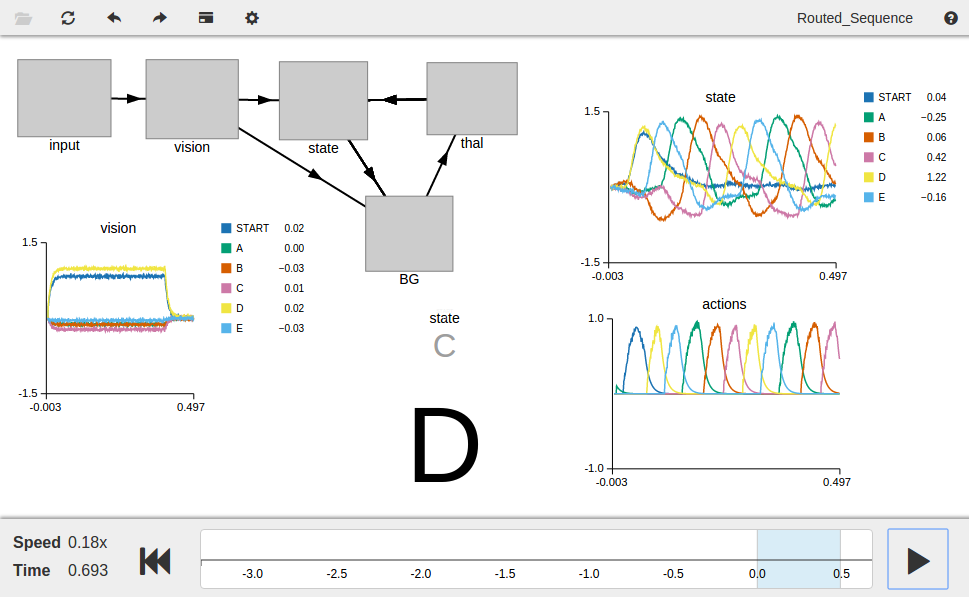

In [5]:
from IPython.display import Image
Image(filename='spa_sequencerouted.png')